<a href="https://colab.research.google.com/github/jamesjmcconnell/Collab-notebooks/blob/main/quilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [501]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [502]:
def rotate_rows(a):
  for x in range(0,len(a)):
    a[x] = np.roll(a[x], x)
  return a

In [503]:
def colour_pattern(a, v):
  for x in range(0,len(a)):
    for y in range(0,len(a[x])):
      a[x][y]= a[x][y] % v
  return a

In [504]:
def width_pattern():
    i = 0
    while True:
        yield i + 2.0
        yield i + 6.25
        yield i + 10.5
        i += 10.5

width_array = [0] + list(itertools.islice(width_pattern(), 27))

## print(width_array)

In [505]:
def height_pattern():
    i = 0
    while True:
        yield i + 1.5
        yield i + 3.5
        yield i + 6.5
        yield i + 10.0
        i += 10

height_array = [0] + list(itertools.islice(height_pattern(), 32))

## print(height_array)

In [506]:
a = np.arange(864).reshape((32, 27))

In [507]:
colour_matrix = colour_pattern(a, 9)

In [508]:
width_matrix = np.tile(width_array, (33, 1))

In [509]:
height_matrix = np.rot90(np.tile(height_array, (28, 1)))

In [510]:
colors = [(227/255, 120/255, 227/255), (99/255, 48/255, 130/255), (107/255, 213/255, 237/255), (227/255, 120/255, 227/255), (69/255, 149/255, 247/255), (70/255, 20/255, 186/255), (227/255, 120/255, 227/255), (14/255, 3/255, 138/255), (165/255, 84/255, 227/255)]  # R, G, B
pbp_custom_cmap = LinearSegmentedColormap.from_list('pbp_custom', colors, N=9)


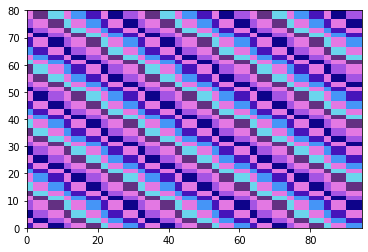

In [511]:
rows = 32
cols = 27
Z = rotate_rows(colour_matrix)
x = width_matrix
y = height_matrix
 
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max(), cmap=pbp_custom_cmap, rasterized=True)